In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
from pathlib import Path

DATA = Path().resolve() / 'data'

/Users/daviddaeschler/Projects/personal/practical-statistics-for-data-scientists/python/notebooks/venv/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
SMALL_SET = DATA / 'small_set.csv'
SMALL_CLOSE_SET = DATA / 'small_close_set.csv'
SMALL_FAR_SET = DATA / 'small_set_far.csv'

In [4]:
from numpy import sqrt

sm = pd.read_csv(SMALL_SET)
print(sm)
print('Median: ', sm['Number'].median())
mean = sm['Number'].mean()
print('Mean: ', mean)
print('StdDev: ', sm['Number'].std())

   Label  Number
0      A       0
1      B       1
2      C       2
3      D       3
4      E       4
5      F       5
6      G       6
7      H       7
8      I       8
9      J       9
10     K      10
11     L      11
12     M      12
13     N      13
14     O      14
15     P      15
16     Q      16
Median:  8.0
Mean:  8.0
StdDev:  5.049752469181039


In [5]:
sm = pd.read_csv(SMALL_CLOSE_SET)
print(sm.sort_values(by='Number'))
print('Median: ', sm['Number'].median())
mean = sm['Number'].mean()
print('Mean: ', mean)
print('StdDev: ', sm['Number'].std())
print('MAD: ', sm['Number'].mad())

   Label  Number
0      A       0
12     M       0
4      E       0
8      I       0
16     Q       0
5      F       1
9      J       1
1      B       1
13     N       1
2      C       2
6      G       2
10     K       2
14     O       2
7      H       3
15     P       3
11     L       3
3      D       3
Median:  1.0
Mean:  1.411764705882353
StdDev:  1.1757350641945108
MAD:  1.0242214532871972


In [6]:
sm = pd.read_csv(SMALL_FAR_SET)
sm = sm.sort_values(by='Number')
print(sm)
print('Median: ', sm['Number'].median())
mean = sm['Number'].mean()
print('Mean: ', mean)
print('StdDev: ', sm['Number'].std())
print('MAD: ', sm['Number'].mad())

   Label  Number
5      F       1
1      B      10
11     L      11
12     M      12
13     N      13
8      I      14
14     O      14
15     P      15
3      D      30
10     K      30
9      J      44
4      E      45
6      G      62
7      H      90
2      C      97
16     Q      99
0      A     100
Median:  30.0
Mean:  40.411764705882355
StdDev:  35.62312946585654
MAD:  29.896193771626294


In [7]:
nd = pd.DataFrame([1,2,3,4,5,6,7,8,9,9,9,9999])
print('Median', nd[0].median())
print('Mean', nd[0].mean())
print('Std', nd[0].std())
print('Trim Mean', trim_mean(nd[0], 0.1))
binned = pd.cut(nd[0], 4)
binned.value_counts()

Median 6.5
Mean 838.5
Std 2884.8107075130283
Trim Mean 6.2


(-8.998, 2500.5]    11
(7499.5, 9999.0]     1
(2500.5, 5000.0]     0
(5000.0, 7499.5]     0
Name: 0, dtype: int64

<AxesSubplot:ylabel='Density'>

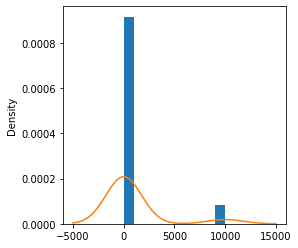

In [8]:
ax = nd[0].plot.hist(density=True, figsize=(4,4))
nd[0].plot.density(ax=ax)

In [35]:
set = []
# create a set of numbers from 0 to 999
for i in range(1000):
    set.append(i)
errset = pd.DataFrame(set)[0]

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(errset, n_samples=1000)
    results.append(sample.mean())

results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original mean: {errset.mean()}')
print(f'sampled mean: {results.mean()}')
print(f'std. error: {results.std()}')
print(results.quantile([0.25, 0.75]))

Bootstrap Statistics:
original mean: 499.5
sampled mean: 499.814338
std. error: 9.019340915072357
0.25    493.52575
0.75    505.77725
dtype: float64


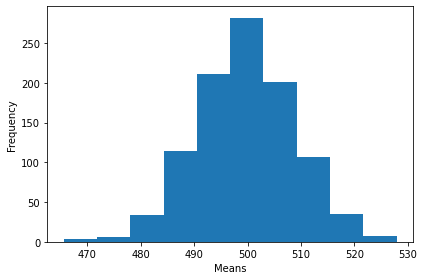

In [32]:
ax = results.plot.hist(figsize=(6, 4))
ax.set_xlabel('Means')

plt.tight_layout()
plt.show()